# Análisis descriptivo de la variable "Ancho del cráneo" de la base de datos cocodrilos.

Calculamos la media, mediana y moda del ancho del cráneo:

In [2]:
# Calculamos la media, mediana y moda del ancho del cráneo, cuyos datos están en el archivo 'cocodrilos.csv'.
import pandas as pd

# Cargamos los datos
data = pd.read_csv('cocodrilos.csv')

# Calcular estadísticas
media = data['CW_1'].mean()
mediana = data['CW_1'].median()
moda = data['CW_1'].mode()  # puede contener múltiples valores

# Mostrar resultados cómo salidas numéricas
print(f"Media de ANCHO DEL CRÁNEO: {media}")
print(f"Mediana de ANCHO DEL CRÁNEO: {mediana}")
if len(moda) == 0:
	print("Moda de ANCHO DEL CRÁNEO: no hay valores válidos")
elif len(moda) == 1:
	print(f"Moda de ANCHO DEL CRÁNEO: {int(moda.iloc[0])}")
else:
	print(f"Modas de ANCHO DEL CRÁNEO: {list(map(int, moda.values))}")

Media de ANCHO DEL CRÁNEO: 166.72727272727272
Mediana de ANCHO DEL CRÁNEO: 132.0
Modas de ANCHO DEL CRÁNEO: [107, 150]


Ahora, calculemos la desviación estándar y la varianza del ancho del cráneo:

In [3]:
# Obteniendo la desviación estándar y la varianza
desviacion_estandar = data['CW_1'].std()
varianza = data['CW_1'].var()

# Imprimiendo los resultados
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")

Varianza: 8857.27272727273
Desviación estándar: 94.11308478247183


Con la desviación estándar, podemos observar que el ancho del cráneo de los cocodrilos se centra en +-94.113 mm alrededor de la media.

Después, graficamos una caja de bigotes (boxplot) para visualizar la distribución del ancho del cráneo y detectar posibles valores atípicos.

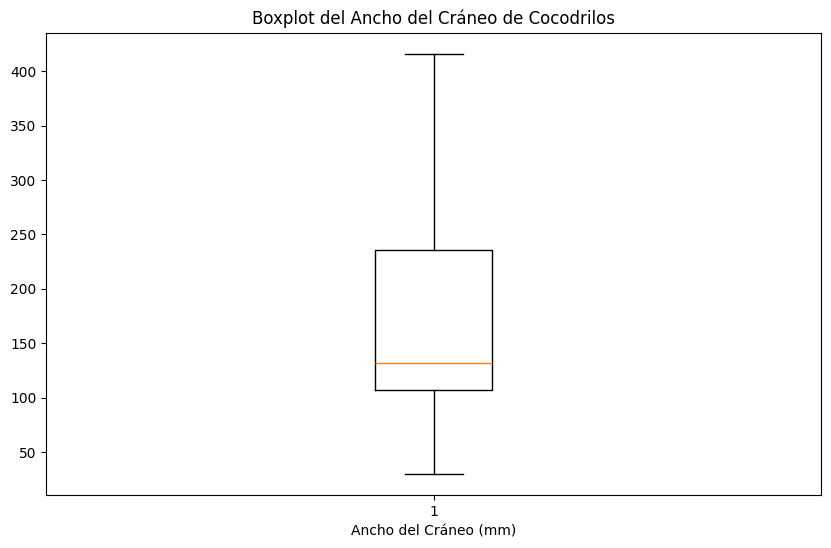

In [4]:
# Graficamos un boxplot para identificar posibles valores atípicos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['CW_1'])
plt.title('Boxplot del Ancho del Cráneo de Cocodrilos')
plt.xlabel('Ancho del Cráneo (mm)')
plt.show()

No hay valores atípicos evidentes en el boxplot, por lo que proseguimos con un histograma para observar la distribución del ancho del cráneo.

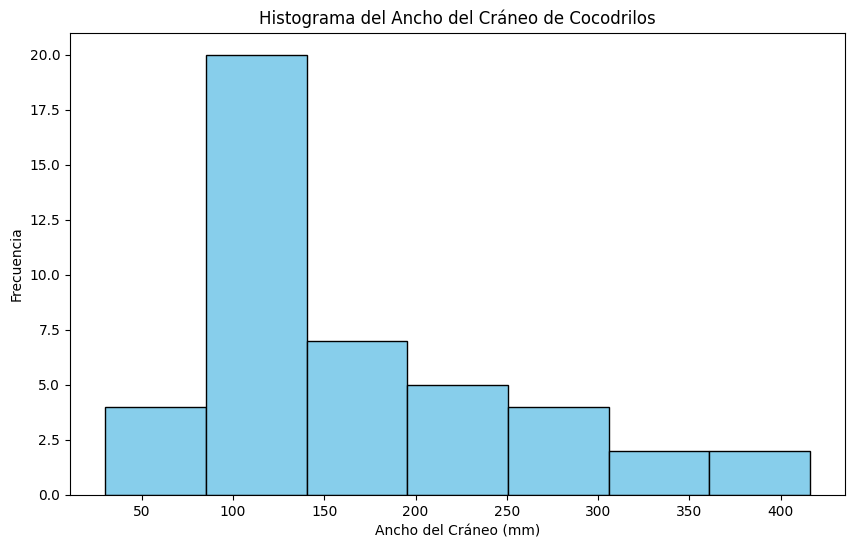

In [5]:
# Calculamos el número de clases usando la regla de Sturges
import numpy as np
n = len(data['CW_1'].dropna())
k = int(np.ceil(1 + 3.322 * np.log10(n)))

# Histograma del ancho del cráneo
plt.figure(figsize=(10, 6))
plt.hist(data['CW_1'], bins=k, color='skyblue', edgecolor='black')
plt.title('Histograma del Ancho del Cráneo de Cocodrilos')
plt.xlabel('Ancho del Cráneo (mm)')
plt.ylabel('Frecuencia')
plt.show()

Luego, obtenemos el sesgo y la curtosis de la variable:

In [6]:
# Calculamos el sesgo y la curtosis de la variable:
from scipy.stats import skew, kurtosis

sesgo = skew(data['CW_1'])
curtosis = kurtosis(data['CW_1'])

print(f"Sesgo del ancho del cráneo: {sesgo}")
print(f"Curtosis del ancho del cráneo: {curtosis}")

Sesgo del ancho del cráneo: 1.0024100456834775
Curtosis del ancho del cráneo: 0.07559686777830743


Como podemos ver, el sesgo es positivo, lo que indica que los datos están más recargados a la izquierda. Aunque la curtosis es positiva, es cercana a 0 por lo que la distribución no es muy puntiaguda ni aplanada.

Posteriormente, vamos a comparar el ancho del cráneo entre las distintas especies de cocodrilos presentes en la base de datos. Primero, calculamos las medidas de tendencia central y dispersión para cada especie:

In [7]:
# Medidas de tendencia central y dispersión por especie (Alligator_mississippiensis, Crocodylus_niloticus, Crocodylus_porosus y Osteolaemus_tetraspis)
grouped = data.groupby('ESPECIE')['CW_1'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan, 'std', 'var'])
grouped.columns = ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance']
print(grouped)

                                  Mean  Median  Mode     Std Dev      Variance
ESPECIE                                                                       
Alligator_mississippiensis  148.909091   150.0   150   48.119548   2315.490909
Crocodylus_niloticus        219.000000   243.0    64  104.327609  10884.250000
Crocodylus_porosus          248.500000   292.0   292  138.046576  19056.857143
Osteolaemus_tetraspis       108.687500   107.0   107   10.830320    117.295833


Con los resultados obtenidos, podemos observar diferencias en el ancho del cráneo entre las especies de cocodrilos. Por ejemplo, la especie Crocodylus_porosus tiene la media más alta de ancho del cráneo, mientras que Osteolaemus_tetraspis tiene la media más baja. Además, la desviación estándar y varianza también varían entre las especies, indicando diferentes niveles de dispersión en los datos.

Después, gráficamos boxplots para cada especie

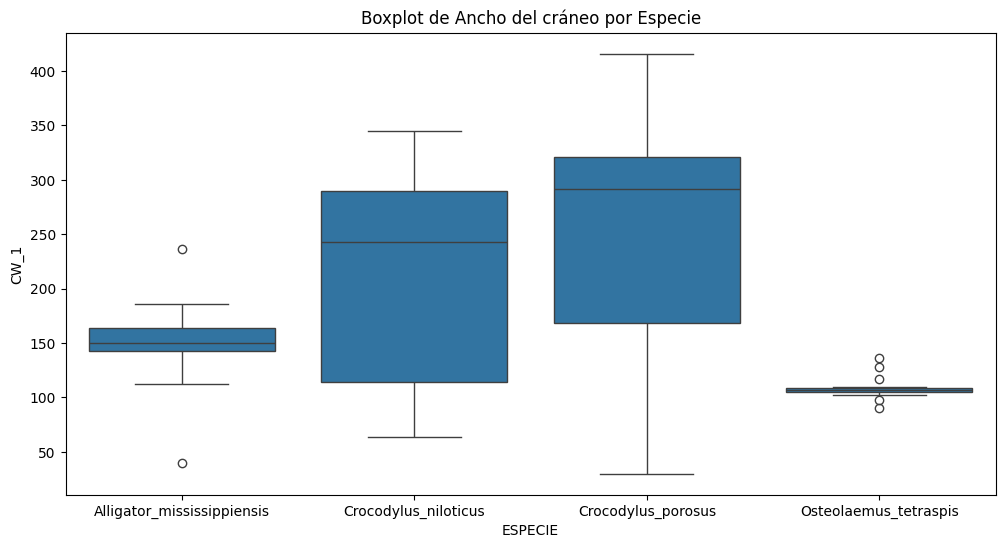

In [8]:
# Boxplots por cada especie

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='ESPECIE', y='CW_1', data=data)
plt.title('Boxplot de Ancho del cráneo por Especie')
plt.show()

Notemos que para las especies Alligator_mississippiensis y Osteolaemus_tetraspis, hay datos atípicos en el ancho del cráneo, por lo que se procederá a colocarlos en los extremos de los bigotes.

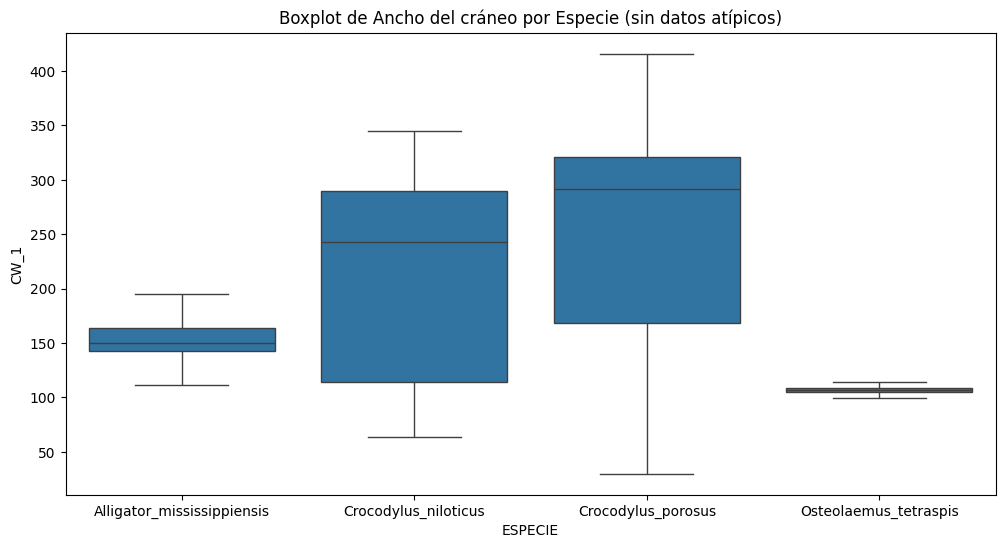

In [10]:
# Colocamos los valores atípicos en los extremos de los bigotes para cada especie

import numpy as np
def cap_outliers(group):
	Q1 = group['CW_1'].quantile(0.25)
	Q3 = group['CW_1'].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	group['CW_1'] = np.where(group['CW_1'] < lower_bound, lower_bound,
							np.where(group['CW_1'] > upper_bound, upper_bound, group['CW_1']))
	return group
data_capped = data.groupby('ESPECIE').apply(cap_outliers, include_groups = False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESPECIE', y='CW_1', data=data_capped)
plt.title('Boxplot de Ancho del cráneo por Especie (sin datos atípicos)')
plt.show()

A partir de este gráfico, podemos observar que la especie Crocodylus_porosus tiene una mayor variabilidad en el ancho del cráneo, mientras que Osteolaemus_tetraspis tiene una menor variabilidad. Además, los valores atípicos en las especies Alligator_mississippiensis y Osteolaemus_tetraspis sugieren que hay individuos con anchos de cráneo significativamente diferentes al resto de su especie.

Luego, graficamos histogramas para cada especie:

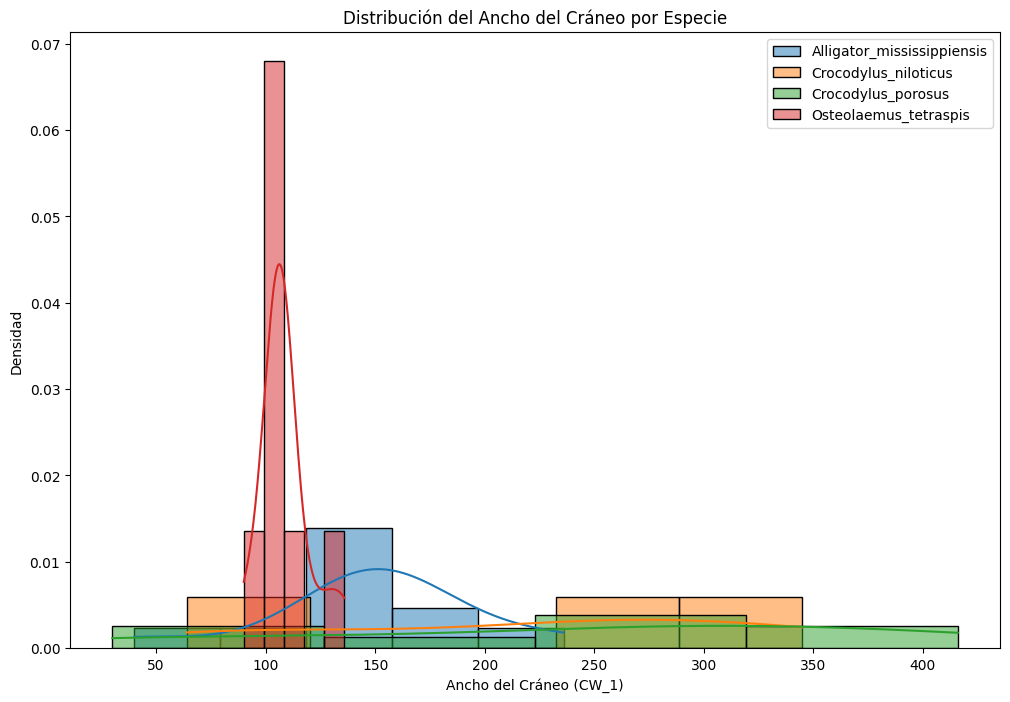

In [21]:
# Usando la regla de Sturges para calcular el número de clases para cada especie
species = data['ESPECIE'].unique()
num_classes = {}
for spec in species:
    spec_data = data[data['ESPECIE'] == spec]['CW_1']
    k = int(np.ceil(np.log2(len(spec_data))) + 1)
    num_classes[spec] = k

# Graficamos histogramas para cada especie en un solo gráfico usando sns
import seaborn as sns
plt.figure(figsize=(12, 8))
for spec in species:
    spec_data = data[data['ESPECIE'] == spec]['CW_1']
    k = num_classes[spec]
    sns.histplot(spec_data, bins=k, kde=True, label=spec, stat="density", common_norm=False)
plt.title('Distribución del Ancho del Cráneo por Especie')
plt.xlabel('Ancho del Cráneo (CW_1)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Por último, calculamos el sesgo y la curtosis del ancho del cráneo para cada especie:

In [12]:
# Calculamos el sesgo y la curtosis del ancho del cráneo para cada especie:
for spec in species:
	spec_data = data[data['ESPECIE'] == spec]['CW_1']
	spec_sesgo = skew(spec_data)
	spec_curtosis = kurtosis(spec_data)
	print(f"Especie: {spec} - Sesgo: {spec_sesgo}, Curtosis: {spec_curtosis}")

Especie: Alligator_mississippiensis - Sesgo: -0.571515131610017, Curtosis: 1.1586485503885458
Especie: Crocodylus_niloticus - Sesgo: -0.3300779175362846, Curtosis: -1.3273882064573703
Especie: Crocodylus_porosus - Sesgo: -0.4859507266704132, Curtosis: -1.0441632461878982
Especie: Osteolaemus_tetraspis - Sesgo: 1.0777647304433877, Curtosis: 1.3325733390816596


El sesgo negativo en las tres primeras especies indica que los datos están más recargados a la derecha, mientras que el sesgo positivo en Osteolaemus_tetraspis indica que los datos están más recargados a la izquierda. En cuanto a la curtosis, las especies Alligator_mississippiensis y Osteolaemus_tetraspis tienen una distribución más puntiaguda, mientras que las otras dos especies tienen una distribución más aplanada.

En conclusión, el análisis descriptivo del ancho del cráneo de los cocodrilos revela diferencias significativas entre el ancho del cráneo de las especies analizadas. Las variaciones en el sesgo y la curtosis sugieren que cada especie tiene características únicas en su morfología.

In [23]:
# Pasar el archivo a HTML --- IGNORE ---
from nbconvert import HTMLExporter
import nbformat

with open("Cocodrilos.ipynb", "r", encoding="utf-8") as f:
    notebook_content = nbformat.read(f, as_version=4)

html_exporter = HTMLExporter()
html_content, resources = html_exporter.from_notebook_node(notebook_content)

with open("Cocodrilos.html", "w", encoding="utf-8") as f:
    f.write(html_content)